In [57]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline
import math

In [225]:
m = np.array([[1.0, 1.0], [1.0, 3.0]])

g = np.array([
    [2*m[0,0], m[0,1]],
    [m[1,0], 2*m[1,1]]
])


def fcn(x):
    return np.sum(np.dot(x, m)*x)

def grad(x):
    return np.dot(x, g)

eta = 0.1
w = 1.2

In [226]:
def momentum(x, w, eta, context):
    old_deltas = context
    deltas = -grad(x)*eta
    if context is None:
        context = deltas
    deltas = context*w + deltas*(1.0-w)
    return deltas, deltas

In [227]:
def descent(x, w, eta, context):
    g = grad(x)
    deltas = -g*eta
    if context is None:
        old_g = g
        old_deltas = deltas
        old_x = x
    else:
        old_deltas, old_g, old_x = context
    #f = np.sum(g*old_g)/math.sqrt(np.sum(g*g)*np.sum(old_g*old_g))
    f = np.sum(-old_deltas*g)/math.sqrt(np.sum(old_deltas*old_deltas)*np.sum(g*g))
    w = w*((1+f)/2)**2
    deltas = old_deltas*w + deltas*(1.0-w)
    print(x, f, w, deltas)
    return deltas, (deltas, g, old_x)
    

In [228]:
x = np.array([15.0, 15.0])
points = [x]
values = [fcn(x)]
context = None
for t in range(20):
    deltas, context = descent(x, w, eta, context)
    x = x + deltas
    points.append(x)
    values.append(fcn(x))
    #print(t, x, fcn(x))
points = np.array(points)
values = np.array(values)
print(values[-1])

[15. 15.] 1.0 1.2 [ -4.5 -10.5]
[10.5  4.5] 0.9815701537842161 1.1779860823105204 [ -4.84707286 -11.70140606]
[ 5.65292714 -7.20140606] -0.876828202790491 0.004551387488346122 [-0.43063764  3.68520032]
[ 5.2222895  -3.51620574] 0.9567476489060163 1.1486584084497666 [-0.39165945  3.99704193]
[4.83063006 0.48083619] -0.5249642725866484 0.06769768269573964 [-0.97206443 -0.4487411 ]
[3.85856563 0.03209509] 0.9987891630747237 1.1985474355274863 [-1.01120642 -0.45740323]
[ 2.84735921 -0.42530813] 0.9327708290937782 1.1206809233387551 [-1.06964802 -0.50903682]
[ 1.77771119 -0.93434496] 0.15553817078644291 0.4005805392433435 [-0.58559266  0.02556902]
[ 1.19211853 -0.90877594] 0.3681498801939443 0.5615502284024111 [-0.39353125  0.20116144]
[ 0.79858728 -0.7076145 ] 0.663205960451862 0.8298762200647803 [-0.34171576  0.22558246]
[ 0.45687152 -0.48203204] 0.6881404507250775 0.8549454544122802 [-0.2984105   0.22818613]
[ 0.15846102 -0.25384591] 0.6434640067676412 0.8102921824622248 [-0.2429963   0.

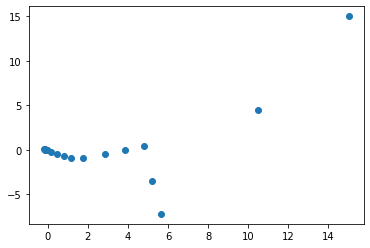

In [229]:
pyplot.scatter(points[:,0], points[:,1])